# **TF-IDF Approach**

In [5]:
# emoji_mood_classifier.py

# 📦 Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns

In [6]:
# !pip install datasets

In [7]:

# 🧠 Load dataset from Hugging Face (optional: use CSV)
from datasets import load_dataset
dataset = load_dataset("dair-ai/emotion")
df = pd.DataFrame(dataset['train'])


/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


README.md:   0%|          | 0.00/9.05k [00:00<?, ?B/s]

train-00000-of-00001.parquet:   0%|          | 0.00/1.03M [00:00<?, ?B/s]

validation-00000-of-00001.parquet:   0%|          | 0.00/127k [00:00<?, ?B/s]

test-00000-of-00001.parquet:   0%|          | 0.00/129k [00:00<?, ?B/s]

Generating train split:   0%|          | 0/16000 [00:00<?, ? examples/s]

Generating validation split:   0%|          | 0/2000 [00:00<?, ? examples/s]

Generating test split:   0%|          | 0/2000 [00:00<?, ? examples/s]

In [8]:
df.head()

,text,label
0,i didnt feel humiliated,0
1,i can go from feeling so hopeless to so damned...,0
2,im grabbing a minute to post i feel greedy wrong,3
3,i am ever feeling nostalgic about the fireplac...,2
4,i am feeling grouchy,3


In [9]:

# 🧹 Basic text + label prep
df = df[['text', 'label']]
label_to_emoji = {
    0: '😢',  # sadness
    1: '😄',  # joy
    2: '❤️',  # love
    3: '😡',  # anger
    4: '😨',  # feare
    5: '😲',  # surprise
}
df['emoji'] = df['label'].map(label_to_emoji)


In [10]:

# 🧪 Split data
X = df['text']
y = df['label']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)


In [11]:

# 🧰 Convert text to TF-IDF vectors
vectorizer = TfidfVectorizer(stop_words='english', max_features=3000)
X_train_tfidf = vectorizer.fit_transform(X_train)
X_test_tfidf = vectorizer.transform(X_test)


In [12]:

# 🤖 Train a Naive Bayes classifier
clf = MultinomialNB()
clf.fit(X_train_tfidf, y_train)


MultinomialNB()

In [13]:

# 📊 Predict and evaluate
y_pred = clf.predict(X_test_tfidf)

print("🔍 Classification Report:")
print(classification_report(y_test, y_pred))


🔍 Classification Report:
              precision    recall  f1-score   support

           0       0.78      0.93      0.85       933
           1       0.72      0.96      0.82      1072
           2       0.98      0.23      0.37       261
           3       0.92      0.68      0.78       432
           4       0.89      0.57      0.69       387
           5       1.00      0.05      0.10       115

    accuracy                           0.78      3200
   macro avg       0.88      0.57      0.60      3200
weighted avg       0.81      0.78      0.75      3200



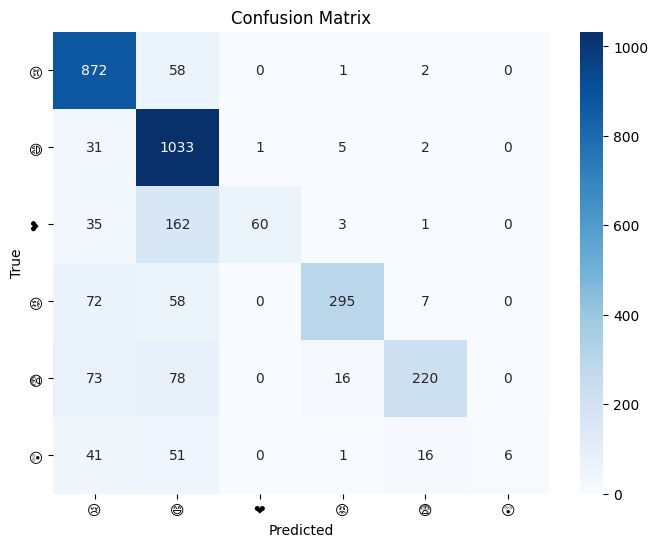

In [14]:

# 🎯 Confusion Matrix
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d',
            xticklabels=label_to_emoji.values(),
            yticklabels=label_to_emoji.values(),
            cmap="Blues")
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()


In [15]:

# 🔁 Try it on a custom input
def predict_mood(text):
    text_vector = vectorizer.transform([text])
    prediction = clf.predict(text_vector)[0]
    return f"Predicted Emotion: {label_to_emoji[prediction]}"


In [16]:

# 🎉 Try it!
print(predict_mood("I can't believe I won the lottery!"))
print(predict_mood("I'm feeling down today..."))

print(predict_mood("i happy"))

Predicted Emotion: 😄
Predicted Emotion: 😄
Predicted Emotion: 😄


# **Using BERT**

In [17]:
import torch
from transformers import AutoTokenizer, AutoModelForSequenceClassification, Trainer, TrainingArguments
from datasets import load_dataset
import numpy as np
from sklearn.metrics import classification_report
from transformers import DataCollatorWithPadding
import os
os.environ["WANDB_DISABLED"] = "true"


tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/483 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/268M [00:00<?, ?B/s]

Some weights of DistilBertForSequenceClassification were not initialized from the model checkpoint at distilbert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight', 'pre_classifier.bias', 'pre_classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Map:   0%|          | 0/16000 [00:00<?, ? examples/s]

Map:   0%|          | 0/2000 [00:00<?, ? examples/s]

Map:   0%|          | 0/2000 [00:00<?, ? examples/s]

/usr/local/lib/python3.11/dist-packages/transformers/training_args.py:1611: FutureWarning: `evaluation_strategy` is deprecated and will be removed in version 4.46 of 🤗 Transformers. Use `eval_strategy` instead
  warnings.warn(
Using the `WANDB_DISABLED` environment variable is deprecated and will be removed in v5. Use the --report_to flag to control the integrations used for logging result (for instance --report_to none).
<ipython-input-17-cef6ec5e4f08>:52: FutureWarning: `tokenizer` is deprecated and will be removed in version 5.0.0 for `Trainer.__init__`. Use `processing_class` instead.
  trainer = Trainer(


Epoch,Training Loss,Validation Loss
1,0.245200,0.184405
2,0.129600,0.147881
3,0.080200,0.147596


TrainOutput(global_step=3000, training_loss=0.19977213781078657, metrics={'train_runtime': 309.1329, 'train_samples_per_second': 155.273, 'train_steps_per_second': 9.705, 'total_flos': 584777647046016.0, 'train_loss': 0.19977213781078657, 'epoch': 3.0})

In [ ]:

# 🔍 Load the emotion dataset
dataset = load_dataset("dair-ai/emotion")


In [ ]:

# 🏷️ Label to emoji mapping
label_to_emoji = {
    0: '😢',  # sadness
    1: '😄',  # joy
    2: '❤️',  # love
    3: '😡',  # anger
    4: '😨',  # fear
    5: '😲',  # surprise
}


In [ ]:

# ⚙️ Load tokenizer and model (DistilBERT for efficiency)
model_name = "distilbert-base-uncased"
tokenizer = AutoTokenizer.from_pretrained(model_name)
model = AutoModelForSequenceClassification.from_pretrained(model_name, num_labels=6)


In [ ]:

# 🧹 Tokenization
def preprocess(example):
    return tokenizer(example['text'], truncation=True)

encoded_dataset = dataset.map(preprocess, batched=True)
encoded_dataset = encoded_dataset.rename_column("label", "labels")
encoded_dataset.set_format("torch")


In [ ]:

# 📦 Data collator for batching
data_collator = DataCollatorWithPadding(tokenizer=tokenizer)


In [ ]:

# 🏋️ Training setup
training_args = TrainingArguments(
    output_dir="./results",
    evaluation_strategy="epoch",
    per_device_train_batch_size=16,
    per_device_eval_batch_size=16,
    num_train_epochs=3,
    weight_decay=0.01,
    logging_steps=10,
    push_to_hub=False,
)


In [ ]:

# 🧠 Trainer API
trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=encoded_dataset["train"],
    eval_dataset=encoded_dataset["validation"],
    tokenizer=tokenizer,
    data_collator=data_collator,
)

# 🚀 Train the model
trainer.train()


In [18]:
# 🧾 Predict on test set
predictions = trainer.predict(encoded_dataset["test"])
y_pred = np.argmax(predictions.predictions, axis=1)
y_true = predictions.label_ids

# 📊 Show classification report
print(classification_report(y_true, y_pred))


              precision    recall  f1-score   support

           0       0.97      0.97      0.97       581
           1       0.93      0.96      0.95       695
           2       0.86      0.79      0.82       159
           3       0.93      0.93      0.93       275
           4       0.88      0.91      0.89       224
           5       0.77      0.67      0.72        66

    accuracy                           0.93      2000
   macro avg       0.89      0.87      0.88      2000
weighted avg       0.93      0.93      0.93      2000



In [20]:

# 🔁 Convert label IDs to emojis for axis labels
labels = list(label_to_emoji.values())


In [21]:

# 📊 Compute confusion matrix
cm = confusion_matrix(y_true, y_pred)


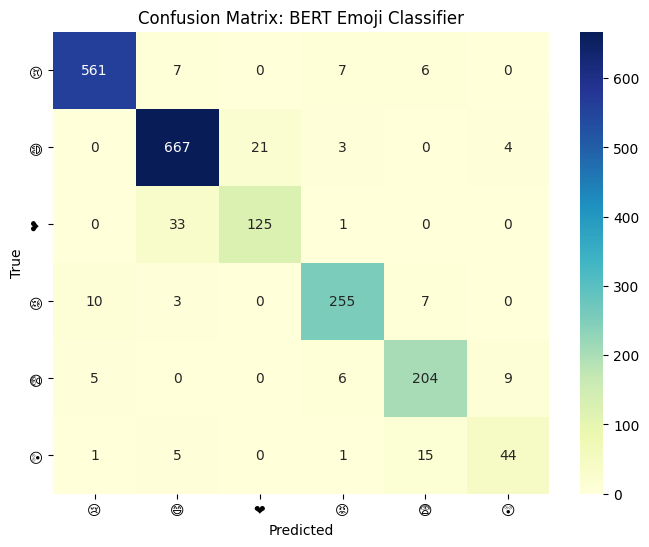

In [22]:

# 🎨 Plot it
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", xticklabels=labels, yticklabels=labels, cmap="YlGnBu")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Confusion Matrix: BERT Emoji Classifier")
plt.show()


In [23]:
def predict_emoji(text):
    # Detect the model’s device (CPU or GPU)
    device = model.device


    # Tokenize and move to correct device
    inputs = tokenizer(text, return_tensors="pt", truncation=True).to(device)

    # Forward pass
    outputs = model(**inputs)
    prediction = torch.argmax(outputs.logits, dim=1).item()
    return label_to_emoji[prediction]


In [24]:

# 🔮 Try some!
print(predict_emoji("I’m feeling on top of the world today!"))
print(predict_emoji("This is so disappointing..."))
print(predict_emoji("I'm laughing from joy"))

😄
😢
😄
